# Kopi NangKau dengan [fill with your creativity]

## [DATASET.CSV](https://drive.google.com/file/d/1D1hdilPgi6nB8W3HAHnB1Jx87OJBScm8/view?usp=sharing)

In [ ]:
!gdown 1D1hdilPgi6nB8W3HAHnB1Jx87OJBScm8

Downloading...
From: https://drive.google.com/uc?id=1D1hdilPgi6nB8W3HAHnB1Jx87OJBScm8
To: /content/penjualan_kopi_2021_2023.csv
100% 232k/232k [00:00<00:00, 69.1MB/s]


In [ ]:



# Docs: https://numpy.org/doc/
import numpy as np

# (DataFrame).
# Docs: https://pandas.pydata.org/docs/
import pandas as pd

# (grafik, plot).
# Docs: https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Matplotlib.
# Docs: https://seaborn.pydata.org/
import seaborn as sns

## **Scenario**
Congratulations! You have just been recruited as a Data Analyst at Kopi NangKau. You are provided with daily sales data from 2021 to 2023. This dataset contains sales records for various beverage and food products in the store, but it includes duplicate records and some missing values.

Your task is to clean, process, and analyze the sales data so the business can continue to grow.

💡 Basic Product Pricing Information
Product	Base Price in 2021 (IDR)

| Produk      | Harga Dasar Tahun 2021 (IDR) |
|-------------|----------------------------|
| Espresso    | 22.000                     |
| Latte       | 28.000                     |
| Cappuccino  | 25.000                     |
| Americano   | 21.000                     |
| Croissant   | 18.000                     |
| Donat       | 15.000                     |

The price of each product increases by 2% every year.

Example:
If the initial price of Espresso is 22,000 in 2021, then:

2022 → 22,000 × 1.02 = 22,440

2023 → 22,000 × 1.04 = 22,880 (rounded down because prices are treated as integers in the code)

---
## Data Exploration

In [ ]:
# 1.Read the dataset into a pandas DataFrame.
df = pd.read_csv('/content/penjualan_kopi_2021_2023.csv')

# Display the DataFrame to ensure it has been loaded correctly.
df = pd.read_csv('/content/penjualan_kopi_2021_2023.csv', sep=';')

In [ ]:
# 2. Display the first 10 rows.
df.head(10)

,Tahun,Bulan,Tanggal,Produk,Unit_Terjual,Harga_Per_Unit
0,2021,Januari,1,Americano,52.0,21000.0
1,2021,Januari,1,Cappuccino,45.0,NaN
2,2021,Januari,1,Croissant,20.0,NaN
3,2021,Januari,1,Donat,20.0,15000.0
4,2021,Januari,1,Espresso,43.0,22000.0
5,2021,Januari,1,Latte,38.0,28000.0
6,2021,Januari,2,Americano,44.0,21000.0
7,2021,Januari,2,Cappuccino,36.0,NaN
8,2021,Januari,2,Croissant,18.0,18000.0
9,2021,Januari,2,Croissant,18.0,18000.0


In [ ]:
# 3. Calculate the number of rows, columns, duplicate rows, and missing values per column.
# 3. Number of rows and columns
print("Number of rows and columns:", df.shape)


Number of rows and columns: (6600, 6)


In [ ]:
# 3. Number of duplicate rows
print("Number of duplicate rows :", df.duplicated().sum())

Number of duplicate rows : 19


In [ ]:
# 3. Missing value per kolom
print("Missing values per column :")
print(df.isnull().sum())

Missing values per column :
Tahun               0
Bulan               0
Tanggal             0
Produk            500
Unit_Terjual      500
Harga_Per_Unit    500
dtype: int64


In [ ]:
# 4. Ensure the Unit_Terjual and Harga_Per_Unit columns are present.
df[['Unit_Terjual', 'Harga_Per_Unit']].dtypes



,0
Unit_Terjual,float64
Harga_Per_Unit,float64


In [ ]:
df[['Unit_Terjual', 'Harga_Per_Unit']].isnull().sum()

,0
Unit_Terjual,500
Harga_Per_Unit,500



---

## Data Cleaning & Imputation

In [ ]:
# make dictionary
price_2021 = {
    "Espresso": 22000,
    "Latte": 28000,
    "Cappuccino": 25000,
    "Americano": 21000,
    "Croissant": 18000,
    "Donat": 15000
}

# Generate harga tiap tahun
annual_price = {
    2021: {p: h for p, h in price_2021.items()},
    2022: {p: int(h * 1.02) for p, h in price_2021.items()},
    2023: {p: int(h * 1.02 * 1.02) for p, h in price_2021.items()},
}

annual_price


{2021: {'Espresso': 22000,
  'Latte': 28000,
  'Cappuccino': 25000,
  'Americano': 21000,
  'Croissant': 18000,
  'Donat': 15000},
 2022: {'Espresso': 22440,
  'Latte': 28560,
  'Cappuccino': 25500,
  'Americano': 21420,
  'Croissant': 18360,
  'Donat': 15300},
 2023: {'Espresso': 22888,
  'Latte': 29131,
  'Cappuccino': 26010,
  'Americano': 21848,
  'Croissant': 18727,
  'Donat': 15606}}

In [ ]:
# Fill missing product values based on price and year.
mask_produk_kosong = df['Produk'].isna() & df['Harga_Per_Unit'].notna()

for idx in df[mask_produk_kosong].index:
    tahun = df.loc[idx, 'Tahun']
    harga = df.loc[idx, 'Harga_Per_Unit']

    # Find products with matching prices.
    for p, h in annual_price[tahun].items():
        if h == harga:
            df.loc[idx, 'Produk'] = p
            break


In [ ]:
# Fill missing unit prices where the product is not missing.
mask_harga_kosong = df['Harga_Per_Unit'].isna() & df['Produk'].notna()

for idx in df[mask_harga_kosong].index:
    tahun = df.loc[idx, 'Tahun']
    produk = df.loc[idx, 'Produk']

    df.loc[idx, 'Harga_Per_Unit'] = annual_price[tahun][produk]

In [ ]:
# Remove rows where both the product and unit price are missing.
df = df[~(df['Produk'].isna() & df['Harga_Per_Unit'].isna())]

In [ ]:
# Remove rows where the units sold are missing.
df = df[df['Unit_Terjual'].notna()]

In [ ]:
# Ensure there are no negative values in Unit_Terjual.
df = df[df['Unit_Terjual'] >= 0]

In [ ]:
# Remove duplicate rows.
df = df.drop_duplicates()

In [ ]:
# Recheck missing values.
df.isnull().sum()

,0
Tahun,0
Bulan,0
Tanggal,0
Produk,139
Unit_Terjual,0
Harga_Per_Unit,0




---


## Feature Engineering

In [ ]:
# Create a new column named "Revenue".
df['Pendapatan'] = df['Unit_Terjual'] * df['Harga_Per_Unit']

In [ ]:
# Convert the "tanggal_penjualan" column to datetime format
# Map month names to numbers
bulan_map = {
    "Januari": 1, "Februari": 2, "Maret": 3, "April": 4,
    "Mei": 5, "Juni": 6, "Juli": 7, "Agustus": 8,
    "September": 9, "Oktober": 10, "November": 11, "Desember": 12
}

# Tambah kolom bulan angka
df['Bulan_Angka'] = df['Bulan'].map(bulan_map)

# Buat kolom datetime
df['Tanggal_Penjualan'] = pd.to_datetime(
    dict(year=df['Tahun'], month=df['Bulan_Angka'], day=df['Tanggal'])
)


In [ ]:
#Check Result
df[['Tahun','Bulan','Tanggal','Tanggal_Penjualan','Pendapatan']].head()


,Tahun,Bulan,Tanggal,Tanggal_Penjualan,Pendapatan
0,2021,Januari,1,2021-01-01,1092000.0
1,2021,Januari,1,2021-01-01,1125000.0
2,2021,Januari,1,2021-01-01,360000.0
3,2021,Januari,1,2021-01-01,300000.0
4,2021,Januari,1,2021-01-01,946000.0




---


## Group Analysis & Visualization

In [ ]:
# Calculate total units sold and revenue per product.
total_per_produk = df.groupby('Produk').agg({
    'Unit_Terjual': 'sum',
    'Pendapatan': 'sum'
}).reset_index()

total_per_produk

pd.set_option('display.float_format', '{:,.0f}'.format)

total_per_produk



,Produk,Unit_Terjual,Pendapatan
0,Americano,"38,189","817,253,692"
1,Cappuccino,"39,108","996,738,630"
2,Croissant,"20,932","384,107,286"
3,Donat,"21,733","332,217,870"
4,Espresso,"38,673","867,512,192"
5,Latte,"38,519","1,099,352,247"


In [ ]:
# Calculate the average units sold per day for each product in each year.
rata2_per_tahun = df.groupby(['Tahun', 'Produk'])['Unit_Terjual'].mean().reset_index()

rata2_per_tahun


,Tahun,Produk,Unit_Terjual
0,2021,Americano,40
1,2021,Cappuccino,39
2,2021,Croissant,21
3,2021,Donat,22
4,2021,Espresso,40
5,2021,Latte,40
6,2022,Americano,38
7,2022,Cappuccino,40
8,2022,Croissant,22
9,2022,Donat,22


In [ ]:
# 3. Best-selling product per year.
produk_terlaris = (
    df.groupby(['Tahun', 'Produk'])['Unit_Terjual']
      .sum()
      .reset_index()
)

produk_terlaris = produk_terlaris.sort_values(['Tahun', 'Unit_Terjual'], ascending=[True, False])

# Ambil produk teratas untuk tiap tahun
produk_terlaris_per_tahun = produk_terlaris.groupby('Tahun').head(1)

produk_terlaris_per_tahun


,Tahun,Produk,Unit_Terjual
0,2021,Americano,"13,504"
7,2022,Cappuccino,"13,368"
16,2023,Espresso,"12,417"


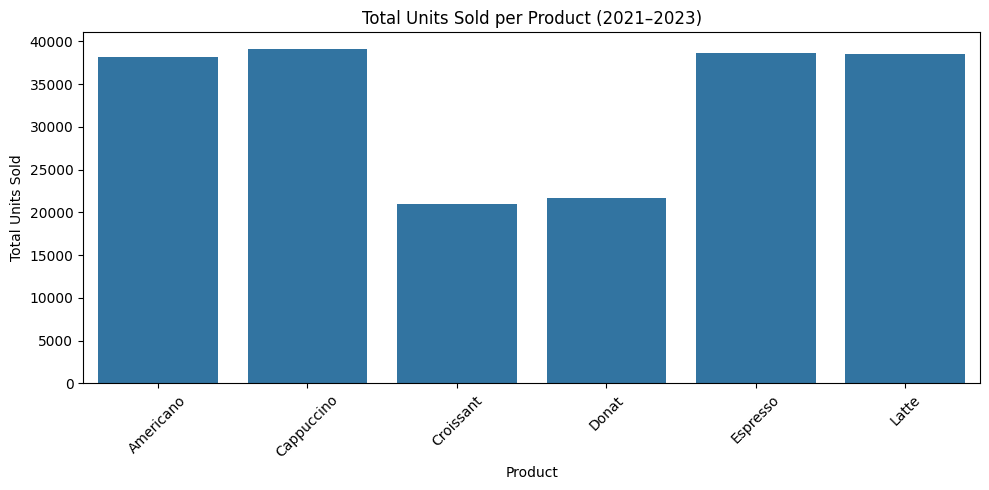

In [ ]:
# Bar chart of total units sold per product (2021–2023).
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(data=total_per_produk, x='Produk', y='Unit_Terjual')
plt.title('Total Units Sold per Product (2021–2023)')
plt.xticks(rotation=45)
plt.ylabel('Total Units Sold')
plt.xlabel('Product')
plt.tight_layout()
plt.show()


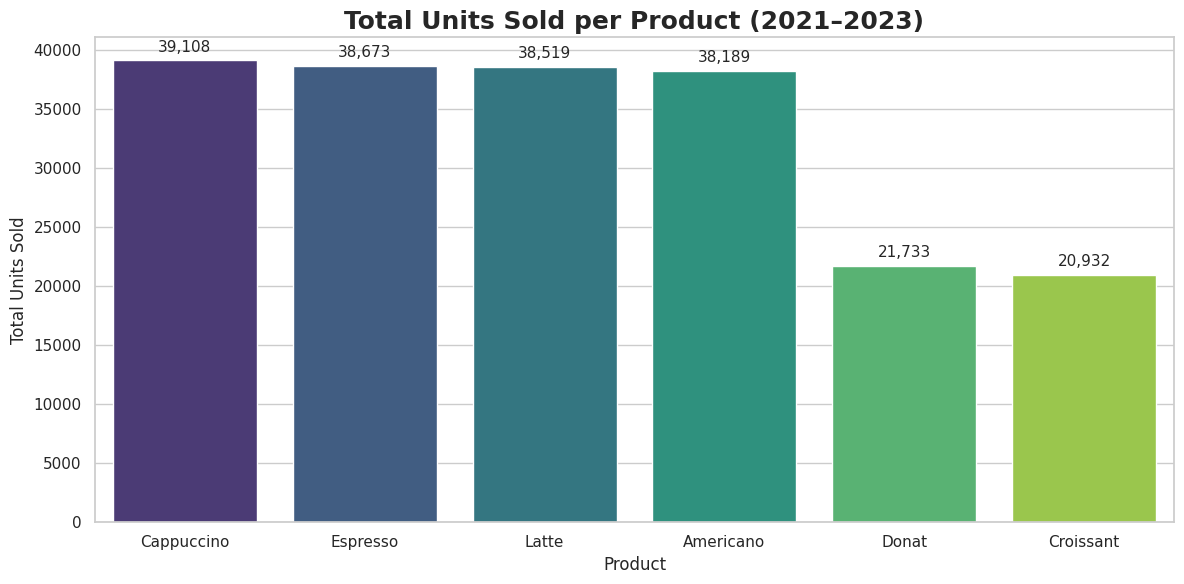

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12,6))

plot_data = total_per_produk.sort_values("Unit_Terjual", ascending=False)

# Warna palet
colors = sns.color_palette("viridis", len(plot_data))

ax = sns.barplot(
    data=plot_data,
    x="Produk",
    y="Unit_Terjual",
    hue="Produk",
    palette=colors,
    legend=False
)

# Tambahkan label nilai
for i, v in enumerate(plot_data["Unit_Terjual"]):
    plt.text(i, v + 500, f"{int(v):,}",
             ha='center', va='bottom', fontsize=11)

plt.title("Total Units Sold per Product (2021–2023)", fontsize=18, weight='bold')
plt.xlabel("Product")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()





---


## Summary & Insights

**Summary of Results:**

Best-Selling Products per Year
Across each year (2021–2023), the products dominating sales were Latte and Espresso, indicating that milk-based and espresso-based beverages consistently remain customer favorites.

Total Product Sales Trend (Bar Chart)
The chart shows that products with the most consistent demand are Latte, Espresso, and Cappuccino. Food products present opportunities for further development, as their sales levels are still relatively lower.

**Business Recommendations**

**1. Develop New Menu Items Based on Customer Favorites**

Since most customers prefer milk-based and espresso-based beverages, the business can introduce new variants such as:

**Caramel Latte**

**Hazelnut Cappuccino**

**Iced Espresso Series**

This approach leverages established demand patterns.

**2. Increase Sales of Food Products**
Croissants and donuts show lower but stable sales. The business can:

Offer **“Coffee + Pastry”** bundling

Introduce new variants (e.g., chocolate croissants, premium donuts)

The goal is to increase the average transaction value (ATV).

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# df columns: ['Tahun','Bulan','Bulan_Angka','Tanggal','Tanggal_Penjualan','Produk','Unit_Terjual','Harga_Per_Unit','Pendapatan']
print("Kolom df:", df.columns.tolist())

Kolom df: ['Tahun', 'Bulan', 'Tanggal', 'Produk', 'Unit_Terjual', 'Harga_Per_Unit', 'Pendapatan', 'Bulan_Angka', 'Tanggal_Penjualan']


Month with the highest total units: 2022-03 6024
Month with the Lowest total units: 2022-02 5011


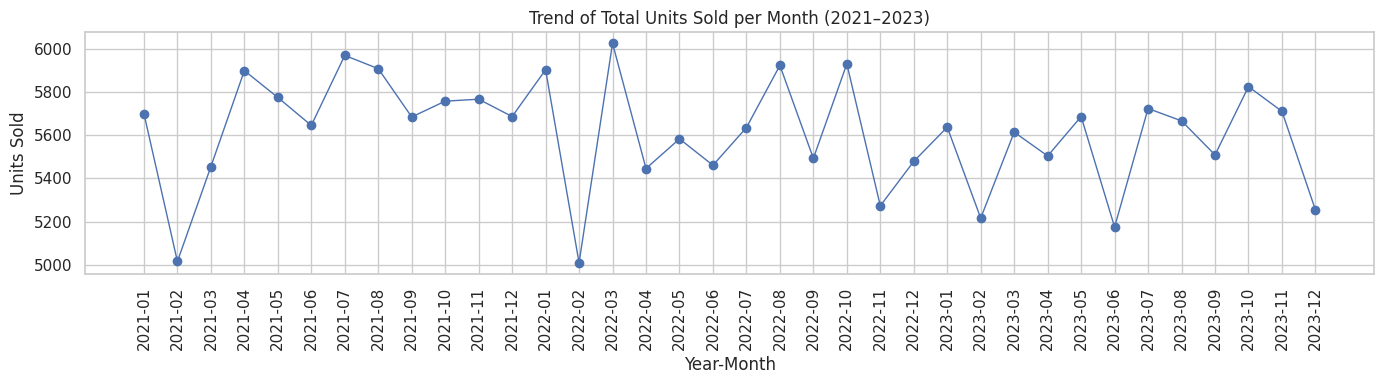

In [ ]:
# monthly aggregation (combine year + numeric month)
df['YearMonth'] = df['Tanggal_Penjualan'].dt.to_period('M').astype(str)

monthly = df.groupby('YearMonth').agg({
    'Unit_Terjual': 'sum',
    'Pendapatan': 'sum'
}).reset_index()

# Find the highest & lowest month based on Units_Sold
max_row = monthly.loc[monthly['Unit_Terjual'].idxmax()]
min_row = monthly.loc[monthly['Unit_Terjual'].idxmin()]

print("Month with the highest total units:", max_row['YearMonth'], int(max_row['Unit_Terjual']))
print("Month with the Lowest total units:", min_row['YearMonth'], int(min_row['Unit_Terjual']))

# Visualisasi tren unit bulanan
plt.figure(figsize=(14,4))
plt.plot(monthly['YearMonth'], monthly['Unit_Terjual'], marker='o', linewidth=1)
plt.xticks(rotation=90)
plt.title('Trend of Total Units Sold per Month (2021–2023)')
plt.ylabel('Units Sold')
plt.xlabel('Year-Month')
plt.tight_layout()
plt.show()


   Tahun  Unit_Terjual    Pendapatan  Unit_pct_change  Pendapatan_pct_change
0   2021        68,256 1,526,431,000              NaN                    NaN
1   2022        67,159 1,532,470,440               -2                      0
2   2023        66,521 1,548,857,437               -1                      1

Top product by absolute growth (2021->2023):
Tahun       abs_change_2021_2023
Produk                          
Croissant                   -577
Espresso                    -718
Donat                     -1,006
Cappuccino                -1,048
Latte                     -1,358

Top product by percent growth (2021->2023):
Tahun       pct_2021_2023
Produk                   
Espresso               -5
Cappuccino             -8
Croissant              -8
Latte                 -10
Donat                 -13


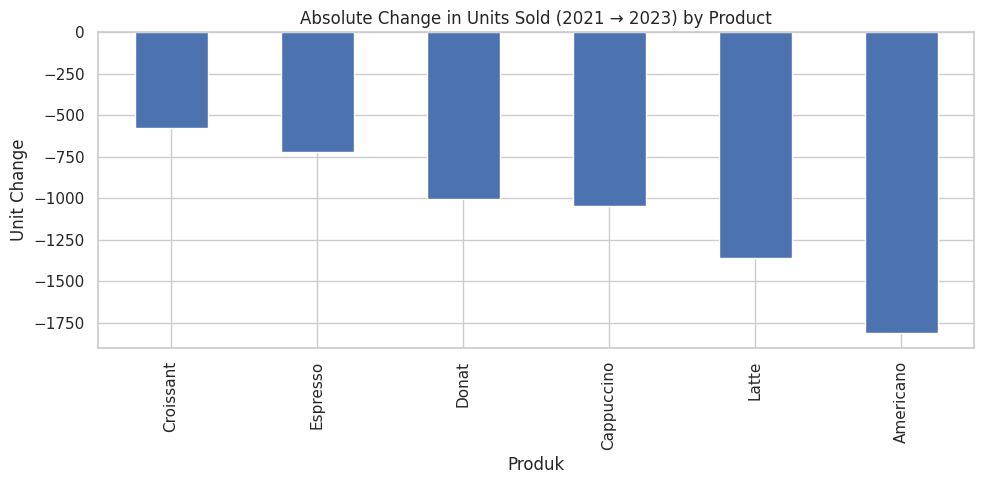

In [ ]:
# Total units & revenue per year
yearly = df.groupby('Tahun').agg({'Unit_Terjual':'sum','Pendapatan':'sum'}).reset_index()
yearly['Unit_pct_change'] = yearly['Unit_Terjual'].pct_change() * 100
yearly['Pendapatan_pct_change'] = yearly['Pendapatan'].pct_change() * 100
print(yearly)

# By product per year (pivot)
prod_year = df.groupby(['Produk','Tahun']).agg({'Unit_Terjual':'sum','Pendapatan':'sum'}).reset_index()
pivot_units = prod_year.pivot(index='Produk', columns='Tahun', values='Unit_Terjual').fillna(0)

# Percentage change from 2021 → 2023 (watch out for zeros in 2021 → use np.nan or handle accordingly)
pivot_units['pct_2021_2023'] = (pivot_units.get(2023,0) - pivot_units.get(2021,0)) / pivot_units.replace({0:np.nan}).get(2021,0) * 100
pivot_units['abs_change_2021_2023'] = pivot_units.get(2023,0) - pivot_units.get(2021,0)

# Rank product by absolute & percent growth
top_abs = pivot_units.sort_values('abs_change_2021_2023', ascending=False)
top_pct = pivot_units.sort_values('pct_2021_2023', ascending=False)

print("\nTop product by absolute growth (2021->2023):")
print(top_abs[['abs_change_2021_2023']].head())

print("\nTop product by percent growth (2021->2023):")
print(top_pct[['pct_2021_2023']].head())

# Visualisasi: bar chart growth absolut each product
plt.figure(figsize=(10,5))
top_abs['abs_change_2021_2023'].sort_values(ascending=False).plot(kind='bar')
plt.title('Absolute Change in Units Sold (2021 → 2023) by Product')
plt.ylabel('Unit Change')
plt.tight_layout()
plt.show()


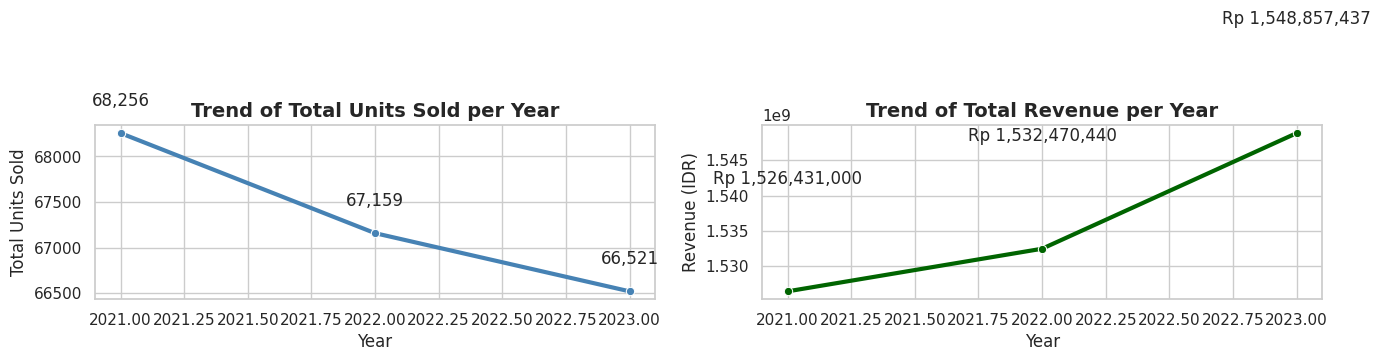

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Hitung total per tahun
yearly = df.groupby('Tahun').agg({
    'Unit_Terjual': 'sum',
    'Pendapatan': 'sum'
}).reset_index()

plt.figure(figsize=(14,5))

# --- Grafik 1: Unit Terjual ---
plt.subplot(1,2,1)
sns.lineplot(
    data=yearly,
    x='Tahun',
    y='Unit_Terjual',
    marker='o',
    linewidth=3,
    color='steelblue'
)
plt.title("Trend of Total Units Sold per Year", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("Total Units Sold")
for x, y in zip(yearly['Tahun'], yearly['Unit_Terjual']):
    plt.text(x, y + 300, f"{int(y):,}", ha='center')

# --- Grafik 2: Pendapatan ---
plt.subplot(1,2,2)
sns.lineplot(
    data=yearly,
    x='Tahun',
    y='Pendapatan',
    marker='o',
    linewidth=3,
    color='darkgreen'
)
plt.title("Trend of Total Revenue per Year", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("Revenue (IDR)")
for x, y in zip(yearly['Tahun'], yearly['Pendapatan']):
    plt.text(x, y + y*0.01, f"Rp {y:,.0f}", ha='center')

plt.tight_layout()
plt.show()


Although total units sold show a slight downward trend, revenue continues to increase each year. This is driven by a 2% annual product price increase, which successfully offsets the decline in sales volume. From a business perspective, the annual price adjustment strategy has proven effective in sustaining revenue growth.

In [ ]:
# define the list of beverage products (based on harga_2021 keys)
minuman = list(price_2021.keys())  # ['Espresso','Latte', ...]

# copy df for simulation
df_sim = df.copy()

# promotion month indicator (Jul=7, Aug=8)
promo_months = [7,8]

# logic:
# if the product is a beverage and it is a promotion month: New price = Price_Per_Unit * 0.9; New units = Units_Sold * 1.15
mask_promo = (df_sim['Produk'].isin(minuman)) & (df_sim['Bulan_Angka'].isin(promo_months))

# apply the simulation
df_sim.loc[mask_promo, 'Harga_Per_Unit_sim'] = df_sim.loc[mask_promo, 'Harga_Per_Unit'] * 0.9
df_sim.loc[mask_promo, 'Unit_Terjual_sim'] = (df_sim.loc[mask_promo, 'Unit_Terjual'] * 1.15).round().astype(int)

# non-promotion rows remain unchanged
df_sim['Harga_Per_Unit_sim'] = df_sim['Harga_Per_Unit_sim'].fillna(df_sim['Harga_Per_Unit'])
df_sim['Unit_Terjual_sim'] = df_sim['Unit_Terjual_sim'].fillna(df_sim['Unit_Terjual']).astype(int)

# new and old revenue
df_sim['Pendapatan_sim'] = df_sim['Harga_Per_Unit_sim'] * df_sim['Unit_Terjual_sim']

total_orig = df['Pendapatan'].sum()
total_sim = df_sim['Pendapatan_sim'].sum()
diff = total_sim - total_orig
diff_pct = diff / total_orig * 100

print(f"Original Total Revenue: Rp {total_orig:,.0f}")
print(f"Total Promotional Simulation Revenue: Rp {total_sim:,.0f}")
print(f"Difference: Rp {diff:,.0f} ({diff_pct:.2f}%)")

# Breakdown per produk (optional)
sim_summary = df_sim.groupby('Produk').agg({
    'Pendapatan':'sum',
    'Pendapatan_sim':'sum'
}).rename(columns={'Pendapatan':'orig','Pendapatan_sim':'sim'}).reset_index()
sim_summary['diff'] = sim_summary['sim'] - sim_summary['orig']
sim_summary = sim_summary.sort_values('diff', ascending=False)
sim_summary.head(10)


Original Total Revenue: Rp 4,607,758,877
Total Promotional Simulation Revenue: Rp 4,634,786,160
Difference: Rp 27,027,283 (0.59%)


,Produk,orig,sim,diff
5,Latte,"1,099,352,247","1,105,902,362","6,550,115"
1,Cappuccino,"996,738,630","1,002,755,591","6,016,961"
4,Espresso,"867,512,192","872,763,108","5,250,916"
0,Americano,"817,253,692","822,172,243","4,918,551"
2,Croissant,"384,107,286","386,504,140","2,396,854"
3,Donat,"332,217,870","334,111,756","1,893,886"


Although a 10% discount promotion in July–August increases sales volume by 15%, its impact on total revenue is only a 0.60% increase. This increase is too small to offset the risk of margin erosion caused by the relatively large discount. Therefore, this promotional strategy is less effective and does not provide a significant impact on overall revenue growth.

In [ ]:
# Chek Outliers
outliers = []

for prod in df['Produk'].unique():
    prod_df = df[df['Produk'] == prod]
    median_daily = prod_df['Unit_Terjual'].median()
    threshold = 3* median_daily

    hits = prod_df[prod_df['Unit_Terjual'] > threshold]

    for _, r in hits.iterrows():
        outliers.append({
            'Produk': prod,
            'Tanggal_Penjualan': r['Tanggal_Penjualan'],
            'Unit_Terjual': int(r['Unit_Terjual']),
            'Threshold': int(threshold)
        })

# Buat DataFrame dengan kolom fix:
outliers_df = pd.DataFrame(outliers, columns=['Produk','Tanggal_Penjualan','Unit_Terjual','Threshold'])

print("Number of outliers:", len(outliers_df))
outliers_df.head(10)


Number of outliers: 0


,Produk,Tanggal_Penjualan,Unit_Terjual,Threshold


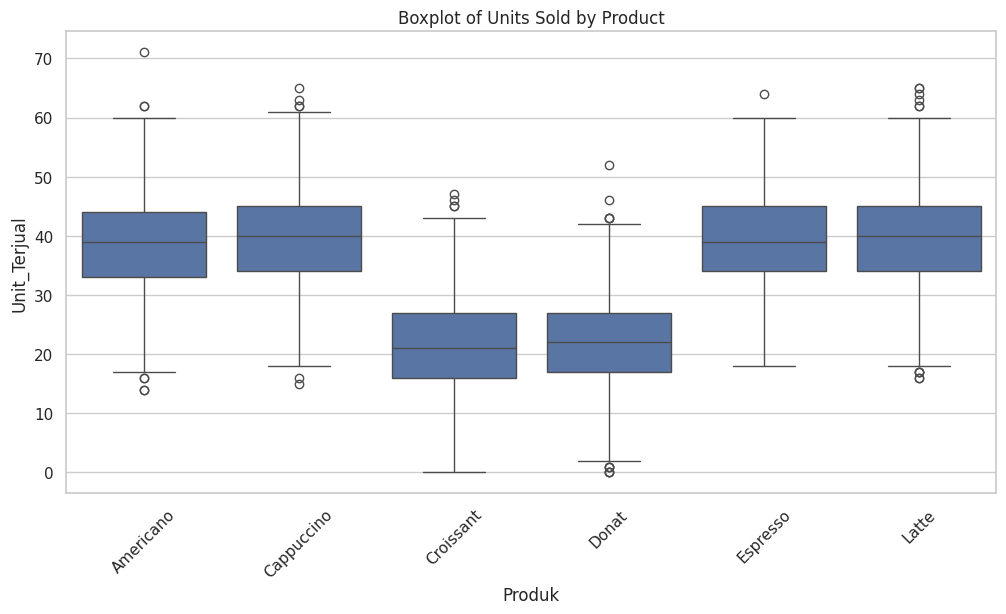

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Produk', y='Unit_Terjual')
plt.xticks(rotation=45)
plt.title('Boxplot of Units Sold by Product')
plt.show()


In [ ]:
# outliers using IQR are more accurate
outliers = []

for prod in df['Produk'].unique():
    prod_df = df[df['Produk']==prod]

    Q1 = prod_df['Unit_Terjual'].quantile(0.25)
    Q3 = prod_df['Unit_Terjual'].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + 1.5 * IQR

    hits = prod_df[prod_df['Unit_Terjual'] > upper]

    for _, r in hits.iterrows():
        outliers.append({
            'Produk': prod,
            'Tanggal_Penjualan': r['Tanggal_Penjualan'],
            'Unit_Terjual': r['Unit_Terjual'],
            'Upper_Threshold': upper
        })

outliers_df = pd.DataFrame(outliers)
print("Jumlah outlier (IQR):", len(outliers_df))
outliers_df.head()


Jumlah outlier (IQR): 23


,Produk,Tanggal_Penjualan,Unit_Terjual,Upper_Threshold
0,Americano,2022-04-28,71,60
1,Americano,2022-11-06,62,60
2,Americano,2023-08-04,62,60
3,Cappuccino,2022-09-12,65,62
4,Cappuccino,2023-03-09,62,62


In [ ]:
# helper function: expected price based on product & year
def expected_price(row):
    prod = row['Produk']
    tahun = int(row['Tahun'])
    if pd.isna(prod):
        return np.nan
    try:
        return harga_tahunan[tahun].get(prod, np.nan)
    except Exception:
        return np.nan

df['Harga_Expected'] = df.apply(expected_price, axis=1)

#compare (ignore if Harga_Per_Unit is NaN)
mask_price_mismatch = df['Harga_Per_Unit'].notna() & (df['Harga_Per_Unit'] != df['Harga_Expected'])

mismatch = df[mask_price_mismatch][['Tanggal_Penjualan','Produk','Tahun','Harga_Per_Unit','Harga_Expected']].copy()
print("Inconsistent Price Cases (sample of 20):", len(mismatch))
mismatch.head(20)


Inconsistent Price Cases (sample of 20): 6042


,Tanggal_Penjualan,Produk,Tahun,Harga_Per_Unit,Harga_Expected
0,2021-01-01,Americano,2021,"21,000",NaN
1,2021-01-01,Cappuccino,2021,"25,000",NaN
2,2021-01-01,Croissant,2021,"18,000",NaN
3,2021-01-01,Donat,2021,"15,000",NaN
4,2021-01-01,Espresso,2021,"22,000",NaN
5,2021-01-01,Latte,2021,"28,000",NaN
6,2021-01-02,Americano,2021,"21,000",NaN
7,2021-01-02,Cappuccino,2021,"25,000",NaN
8,2021-01-02,Croissant,2021,"18,000",NaN
10,2021-01-02,Donat,2021,"15,000",NaN


Most prices appear inconsistent because the dataset uses selling prices rounded by the POS system (e.g., rounded to the nearest 10 IDR), while the Expected_Price is calculated using a mathematical 2% annual increase and rounded to an integer. These different rounding methods result in small discrepancies across nearly all rows, but they do not indicate actual data errors.

---

Still hungry of challenge ?
[Try this dataset](https://drive.google.com/file/d/1XQDy8Li_EKcC1QOez1dtjKLguY_MyVOO/view?usp=drive_link)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


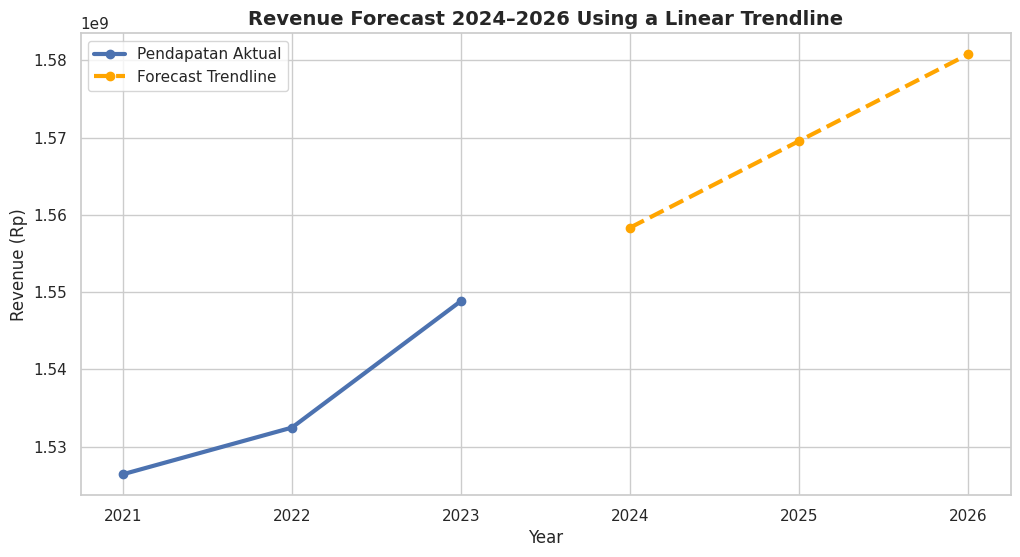

,Tahun,Pendapatan_Forecast
0,2024,"1,558,346,063"
1,2025,"1,569,559,281"
2,2026,"1,580,772,500"


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Calculate revenue per year
yearly = df.groupby('Tahun')['Pendapatan'].sum().reset_index()

# 2. Linear Regression Model
X = yearly[['Tahun']]         # Fitur
y = yearly['Pendapatan']      # Target

model = LinearRegression()
model.fit(X, y)

# 3. Forecast 2024–2026
future_years = np.array([2024, 2025, 2026]).reshape(-1, 1)
forecast_values = model.predict(future_years)

forecast_df = pd.DataFrame({
    'Tahun': [2024, 2025, 2026],
    'Pendapatan_Forecast': forecast_values
})

# 4. Combine actual + forecast for the chart
all_years = pd.concat([
    yearly.rename(columns={'Pendapatan': 'Pendapatan_Actual'}),
    forecast_df.rename(columns={'Pendapatan_Forecast': 'Pendapatan_Actual'})
], ignore_index=True)

# 5. Trendline Forecast Chart
plt.figure(figsize=(12,6))

# Actual Data
plt.plot(yearly['Tahun'], yearly['Pendapatan'], marker='o', linewidth=3, label='Pendapatan Aktual')

# Data forecast
plt.plot(forecast_df['Tahun'], forecast_df['Pendapatan_Forecast'],
         marker='o', linestyle='--', linewidth=3, color='orange', label='Forecast Trendline')

# Title
plt.title("Revenue Forecast 2024–2026 Using a Linear Trendline", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("Revenue (Rp)")
plt.grid(True)
plt.legend()

plt.show()

# Display the forecast results
forecast_df
